1. What is the overall trend in user engagement throughout the campaign period?

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#loading dataset

df = pd.read_csv(r"C:\Users\PrajjnaaRayChoudhury\OneDrive\Documents\Digital Marketing\online_advertising_performance_data.csv")
df

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Unnamed: 12,Unnamed: 13
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,NaN,NaN
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,NaN,NaN
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,NaN,NaN
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,NaN,NaN
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15403,April,1,camp 1,Low,160 x 600,ghi,16,0.0249,0,0.0000,0,0.0000,NaN,NaN
15404,April,1,camp 1,Low,160 x 600,mno,2234,0.4044,10,1.8347,3,101.7494,NaN,NaN
15405,June,29,camp 1,High,800 x 250,ghi,1,0.0157,0,0.0000,0,0.0000,NaN,NaN
15406,June,29,camp 1,High,800 x 250,mno,4,0.0123,0,0.0000,0,0.0000,NaN,NaN


In [24]:
engagement_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['user_engagement'] = df['user_engagement'].map(engagement_mapping)
df.groupby('month')['user_engagement'].mean().reset_index()


,month,user_engagement
0,April,1.909395
1,June,2.038791
2,May,2.052072


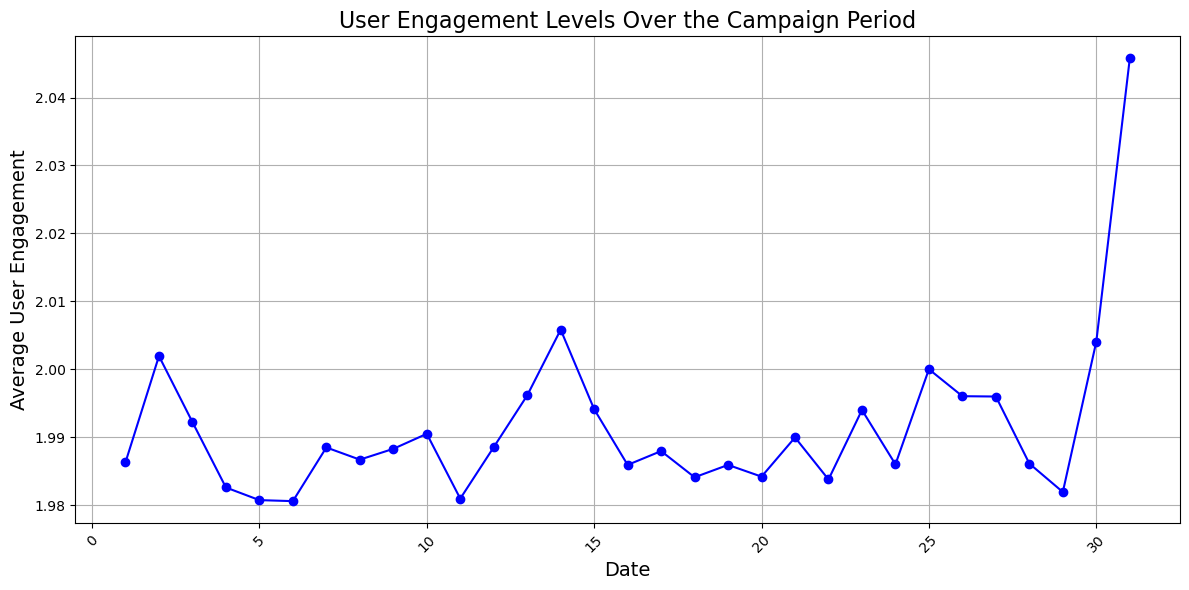

In [25]:
engagement_summary = df.groupby('day')['user_engagement'].mean().reset_index()

# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(engagement_summary['day'], engagement_summary['user_engagement'], marker='o', color='b')
plt.title('User Engagement Levels Over the Campaign Period', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average User Engagement', fontsize=14)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

2. How does the size of the ad (banner) impact the number of clicks generated?

In [26]:
df['clicks'] = pd.to_numeric(df['clicks'], errors='coerce')
    
    # Group the data by 'banner' and calculate the total number of clicks for each banner size
d1 = df.groupby('banner')['clicks'].sum().reset_index()
    
    # Rename the columns for meaningful names
d1.columns == ['banner', 'total_clicks']

d1.rename(columns={'banner': 'banner', 'clicks': 'total_clicks'}, inplace=True)
d1

,banner,total_clicks
0,160 x 600,239570
1,240 x 400,1113256
2,300 x 250,411214
3,468 x 60,1295
4,580 x 400,120681
5,670 x 90,37203
6,728 x 90,569606
7,800 x 250,12


In [27]:
print("It is observed that the number of clicks increases with the increase in banner size.")

It is observed that the number of clicks increases with the increase in banner size.


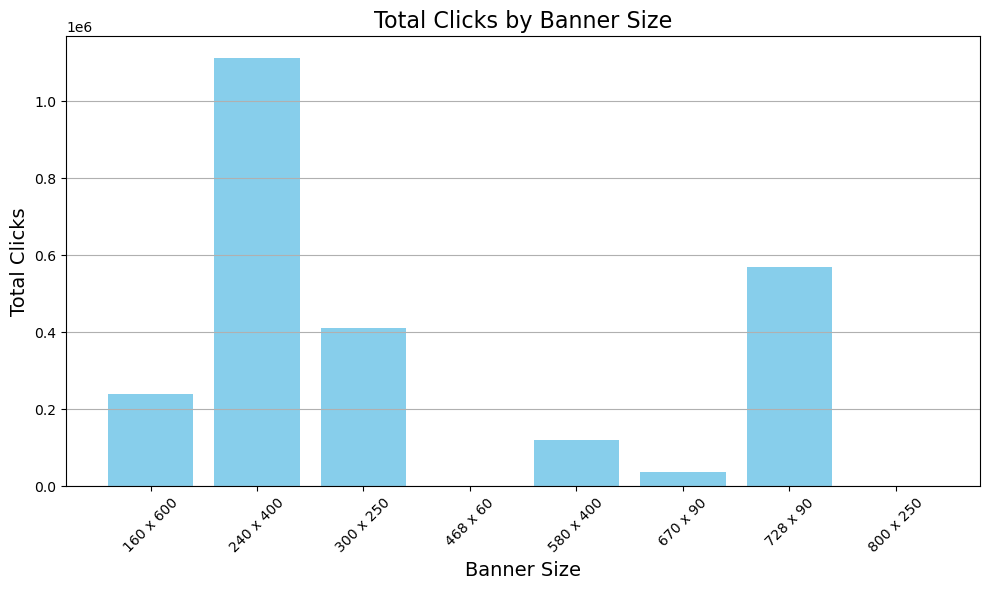

In [28]:

plt.figure(figsize=(10, 6))
plt.bar(d1['banner'], d1['total_clicks'], color='skyblue')
plt.title('Total Clicks by Banner Size', fontsize=16)
plt.xlabel('Banner Size', fontsize=14)
plt.ylabel('Total Clicks', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

3.	Which publisher spaces (placements) yielded the highest number of displays and clicks?

In [29]:
placement_summary = df.groupby('placement').agg({'displays': 'sum', 'clicks': 'sum'}).reset_index()

# Sort by displays and clicks
placement_summary = placement_summary.sort_values(by=['displays', 'clicks'], ascending=False)

# Display the results
print(placement_summary)

  placement   displays   clicks
4       mno  143161775   993039
2       ghi   59740415  1247049
1       def   28177492   176097
3       jkl    7692732    75063
0       abc     242142     1584


4.	Is there a correlation between the cost of serving ads and the revenue generated from clicks?

In [30]:
print("Correlation between the cost of serving ads and the revenue generated from clicks")
print(df['cost'].corr(df['revenue']))

Correlation between the cost of serving ads and the revenue generated from clicks
0.7605199343382345


5.	What is the average revenue generated per click for Company X during the campaign period?

In [31]:
total_revenue = df['revenue'].sum()
total_clicks = df['clicks'].sum()

# Calculate average revenue per click
average_revenue_per_click = total_revenue / total_clicks

# Display the result
print(f"Average revenue per click: {average_revenue_per_click: .2f}")

Average revenue per click:  0.11


6.	Which campaigns had the highest post-click conversion rates?

In [32]:
campaign_summary = df.groupby('campaign_number').agg({'clicks': 'sum', 'post_click_conversions': 'sum'}).reset_index()


campaign_summary['conversion_rate'] = (campaign_summary['post_click_conversions'] / campaign_summary['clicks']) * 100

campaign_summary = campaign_summary.sort_values(by='conversion_rate', ascending=False)


print(campaign_summary[['campaign_number', 'conversion_rate']])

  campaign_number  conversion_rate
0          camp 1        44.927175
2          camp 3         2.427139
1          camp 2         1.562376


7.	Are there any specific trends or patterns in post-click sales amounts over time?

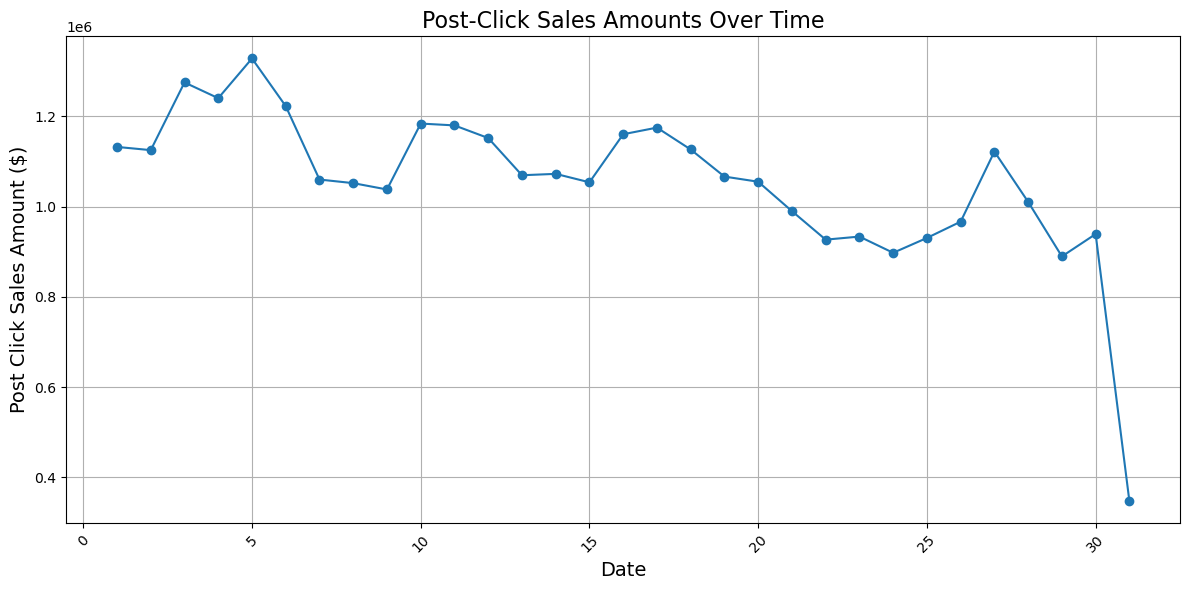

In [33]:
sales_trend = df.groupby('day')['post_click_sales_amount'].sum().reset_index()

# Plotting the trend
plt.figure(figsize=(12, 6))
plt.plot(sales_trend['day'], sales_trend['post_click_sales_amount'], marker='o')
plt.title('Post-Click Sales Amounts Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Post Click Sales Amount (\$)', fontsize=14)
plt.xticks(rotation=45)
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

8.	How does the level of user engagement vary across different banner sizes?

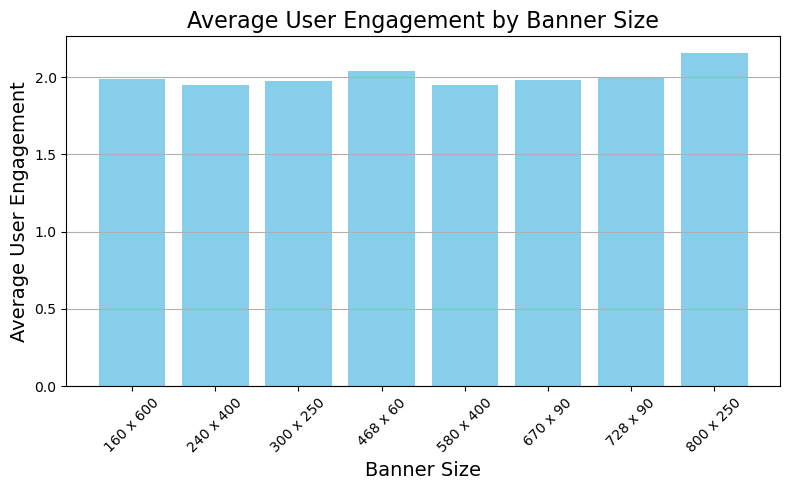

In [34]:
engagement_summary = df.groupby('banner')['user_engagement'].mean().reset_index()

# Plotting the engagement levels
plt.figure(figsize=(8, 5))
plt.bar(engagement_summary['banner'], engagement_summary['user_engagement'], color='skyblue')
plt.title('Average User Engagement by Banner Size', fontsize=16)
plt.xlabel('Banner Size', fontsize=14)
plt.ylabel('Average User Engagement', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

9. Which placement types result in the highest post-click conversion rates?

In [35]:
placement_summary = df.groupby('placement').agg({'post_click_conversions': 'sum', 'clicks': 'sum'}).reset_index()

# Calculate post-click conversion rate
placement_summary['conversion_rate'] = (placement_summary['post_click_conversions'] / placement_summary['clicks']) * 100

# Sort by conversion rate in descending order
placement_summary = placement_summary.sort_values(by='conversion_rate', ascending=False)

# Display the results
print(placement_summary[['placement', 'conversion_rate']])

  placement  conversion_rate
0       abc        52.020202
3       jkl        27.780664
2       ghi        27.028850
4       mno        26.501477
1       def        16.954292


10. Can we identify any seasonal patterns or fluctuations in displays and clicks throughout the campaign period?

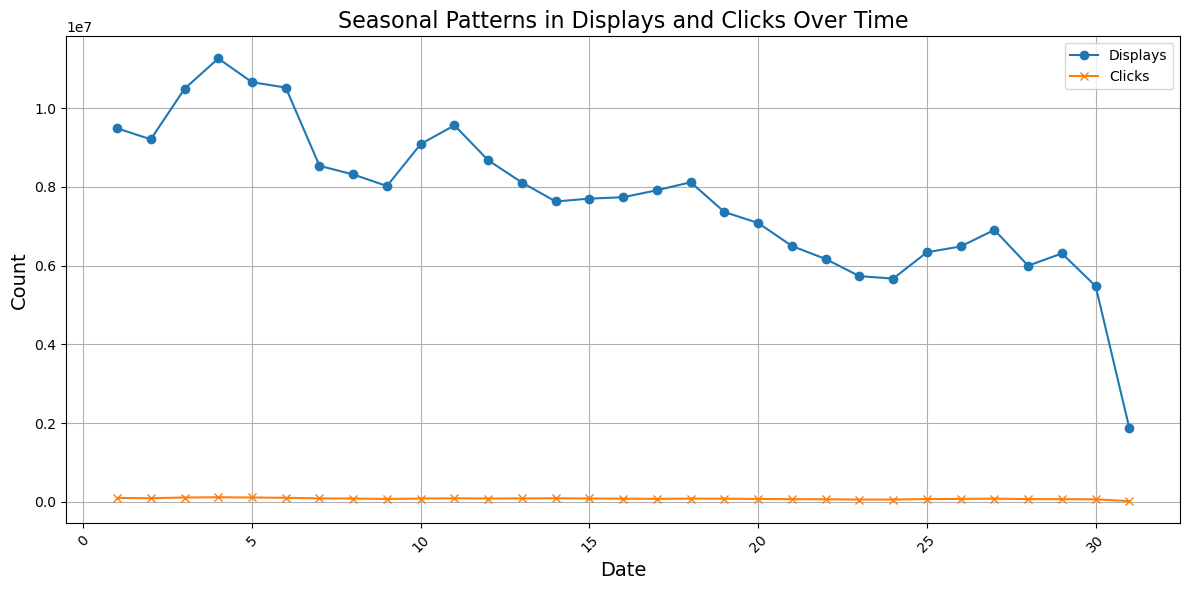

In [36]:
seasonal_trend = df.groupby('day').sum().reset_index()

# Plotting the trends
plt.figure(figsize=(12, 6))
plt.plot(seasonal_trend['day'], seasonal_trend['displays'], label='Displays', marker='o')
plt.plot(seasonal_trend['day'], seasonal_trend['clicks'], label='Clicks', marker='x')
plt.title('Seasonal Patterns in Displays and Clicks Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

11. Is there a correlation between user engagement levels and the revenue generated?

Correlation between user engagement and revenue: 0.1753892426950334


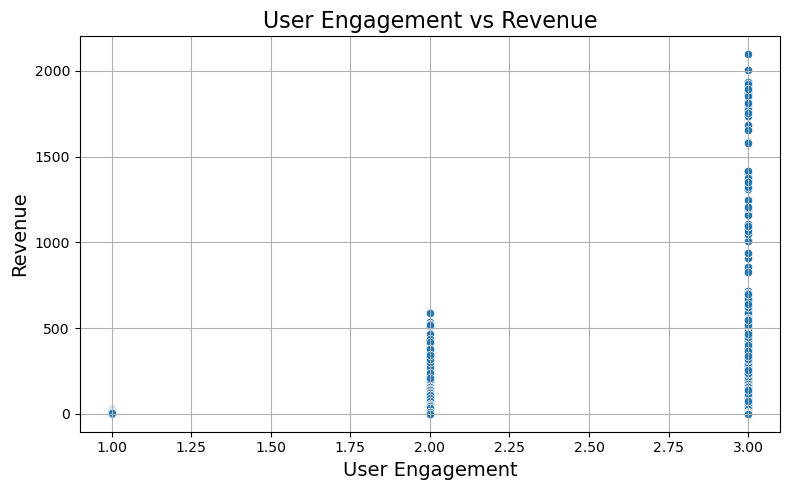

In [37]:
correlation = df['user_engagement'].corr(df['revenue'])
print(f'Correlation between user engagement and revenue: {correlation}')

# Plotting the relationship
plt.figure(figsize=(8, 5))
sns.scatterplot(x='user_engagement', y='revenue', data=df)
plt.title('User Engagement vs Revenue', fontsize=16)
plt.xlabel('User Engagement', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

12. Are there any outliers in terms of cost, clicks, or revenue that warrant further investigation?

Cost Outliers:
 1         26.7824
2         27.6304
3        216.8750
9         11.1678
10        50.5157
           ...   
15320    208.0751
15322    105.7007
15331      8.3755
15337      6.6968
15352      9.0831
Name: cost, Length: 2515, dtype: float64
Clicks Outliers:
 1         158
2         158
3        1796
9         185
10        309
         ... 
15304     229
15320    1235
15322     649
15362     182
15401     195
Name: clicks, Length: 2325, dtype: int64
Revenue Outliers:
 1         28.9717
2         28.9771
3        329.4518
9         33.9397
10        56.6775
           ...   
15320    139.0000
15322     73.0000
15331     12.7235
15362     10.2462
15401     10.9785
Name: revenue, Length: 2512, dtype: float64


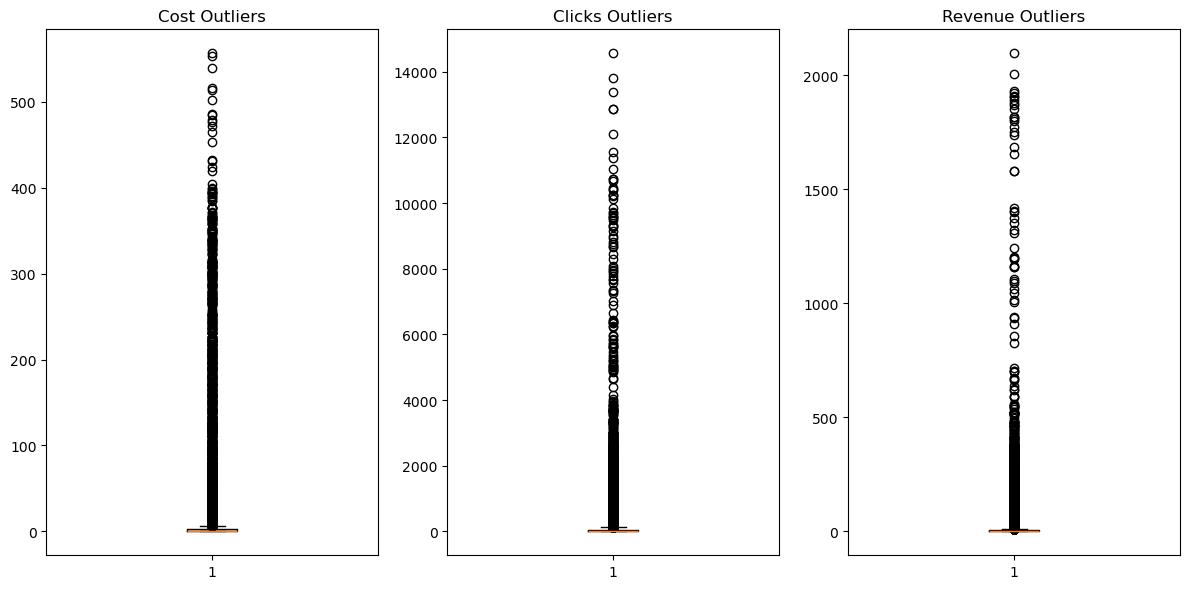

In [38]:
def identify_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Identify outliers for cost, clicks, and revenue
cost_outliers = identify_outliers_iqr(df['cost'])
clicks_outliers = identify_outliers_iqr(df['clicks'])
revenue_outliers = identify_outliers_iqr(df['revenue'])

# Print outliers
print("Cost Outliers:\n", cost_outliers)
print("Clicks Outliers:\n", clicks_outliers)
print("Revenue Outliers:\n", revenue_outliers)

# Plotting box plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.boxplot(df['cost'])
plt.title('Cost Outliers')

plt.subplot(1, 3, 2)
plt.boxplot(df['clicks'])
plt.title('Clicks Outliers')

plt.subplot(1, 3, 3)
plt.boxplot(df['revenue'])
plt.title('Revenue Outliers')

plt.tight_layout()
plt.show()

13. How does the effectiveness of campaigns vary based on the size of the ad and placement type?

       banner placement  clicks  post_click_conversions        cost  \
0   160 x 600       abc       3                       0      1.8202   
1   160 x 600       def   20257                    2525   1455.2348   
2   160 x 600       ghi    9799                    4021   1745.1147   
3   160 x 600       jkl       0                       0      0.0015   
4   160 x 600       mno  209511                   42239  14314.1867   
5   240 x 400       def   48452                    5376   2985.5852   
6   240 x 400       ghi  866275                  210014  31468.6141   
7   240 x 400       jkl   52580                   13978   2330.0251   
8   240 x 400       mno  145949                   40497  19631.3904   
9   300 x 250       abc     270                     140     25.2463   
10  300 x 250       def   38932                    8450   3260.5015   
11  300 x 250       ghi  117586                   26609   4227.5775   
12  300 x 250       jkl    2538                     877    304.4356   
13  30

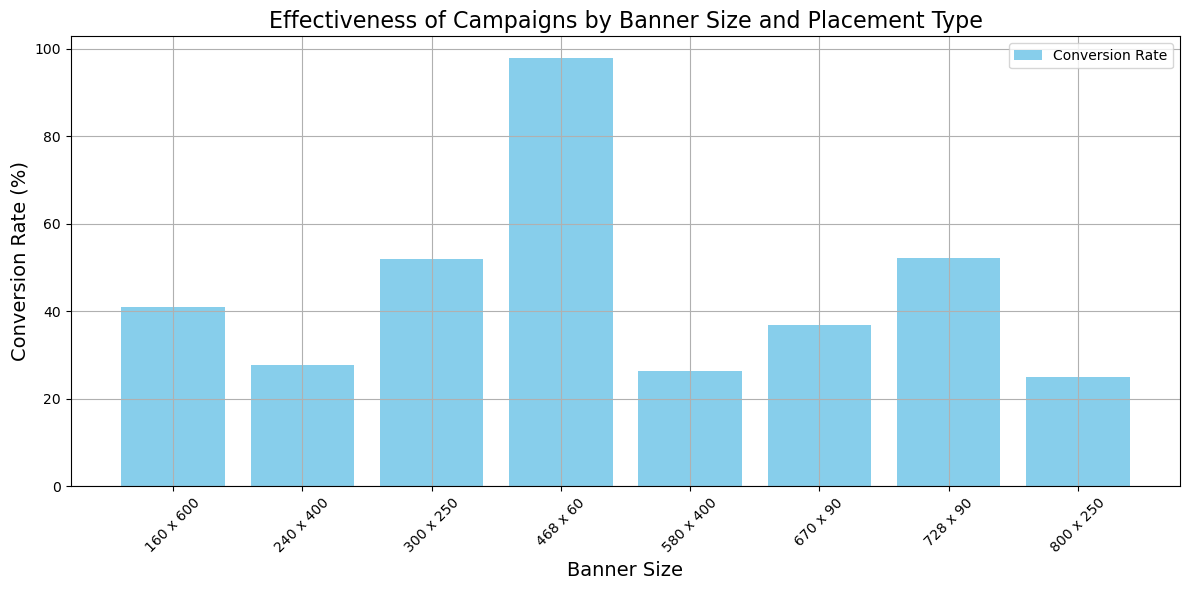

In [39]:
effectiveness_summary = df.groupby(['banner', 'placement']).agg({'clicks': 'sum','post_click_conversions': 'sum','cost':'sum'}).reset_index()

# Calculate conversion rate and CPC
effectiveness_summary['conversion_rate'] = (effectiveness_summary['post_click_conversions'] / effectiveness_summary['clicks']) * 100
effectiveness_summary['cost per click'] = effectiveness_summary['cost'] / effectiveness_summary['clicks']

# Display the summary
print(effectiveness_summary)

# Plotting the effectiveness
plt.figure(figsize=(12, 6))
plt.bar(effectiveness_summary['banner'], effectiveness_summary['conversion_rate'], color='skyblue', label='Conversion Rate')
plt.title('Effectiveness of Campaigns by Banner Size and Placement Type', fontsize=16)
plt.xlabel('Banner Size', fontsize=14)
plt.ylabel('Conversion Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

14. Are there any specific campaigns or banner sizes that consistently outperform others in terms of ROI?

In [40]:
df['ROI'] = ((df['revenue'] - df['cost']) / df['cost']) * 100

roi_summary = df.groupby(['campaign_number', 'banner']).agg({'ROI': 'mean'}).reset_index()

# Sort by ROI in descending order
roi_summary = roi_summary.sort_values(by='ROI', ascending=False)

# Display the summary
print(roi_summary)

   campaign_number     banner         ROI
23          camp 3  800 x 250         inf
16          camp 3  160 x 600  309.675736
0           camp 1  160 x 600  293.191051
12          camp 2  580 x 400  211.367802
20          camp 3  580 x 400  200.425514
1           camp 1  240 x 400  153.118730
2           camp 1  300 x 250  117.172481
4           camp 1  580 x 400  107.033428
9           camp 2  240 x 400   90.661139
13          camp 2   670 x 90   85.174113
21          camp 3   670 x 90   80.312573
3           camp 1   468 x 60   68.666006
5           camp 1   670 x 90   67.281021
10          camp 2  300 x 250   66.325052
6           camp 1   728 x 90   65.927427
18          camp 3  300 x 250   53.061350
8           camp 2  160 x 600   51.129118
19          camp 3   468 x 60   47.104257
14          camp 2   728 x 90   26.788212
17          camp 3  240 x 400   22.335918
22          camp 3   728 x 90   13.475635
11          camp 2   468 x 60    9.681525
15          camp 2  800 x 250   -8

15. What is the distribution of post-click conversions across different placement types?

  placement  post_click_conversions
0       abc                     824
1       def                   29856
2       ghi                  337063
3       jkl                   20853
4       mno                  263170


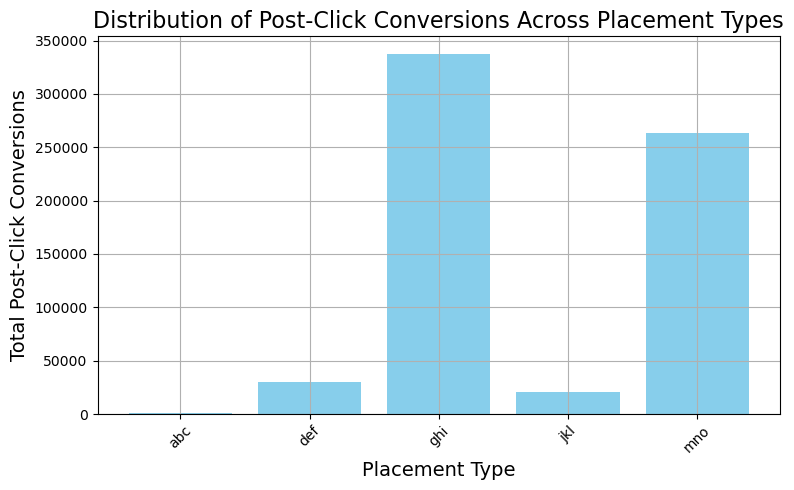

In [41]:
conversion_distribution = df.groupby('placement')['post_click_conversions'].sum().reset_index()

# Display the distribution
print(conversion_distribution)

# Plotting the distribution
plt.figure(figsize=(8, 5))
plt.bar(conversion_distribution['placement'], conversion_distribution['post_click_conversions'], color='skyblue')
plt.title('Distribution of Post-Click Conversions Across Placement Types', fontsize=16)
plt.xlabel('Placement Type', fontsize=14)
plt.ylabel('Total Post-Click Conversions', fontsize=14)
plt.xticks(rotation=45)
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

16. Are there any noticeable differences in user engagement levels between weekdays and weekends?

  day_type  user_engagement
0  Weekday         1.988545
1  Weekend         1.994328


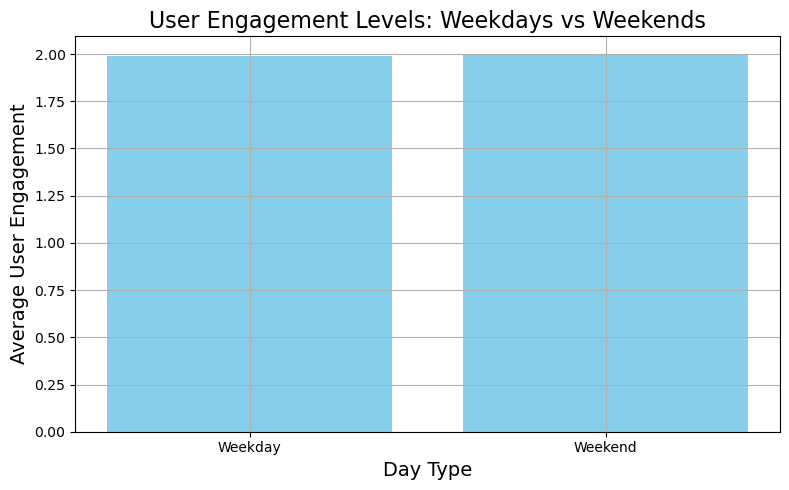

In [42]:
year = 2020
df['date'] = pd.to_datetime(df['month'] + ' ' + df['day'].astype(str) + ' ' + str(year))

df['date'] = pd.to_datetime(df['date'])
df['day_type'] = df['date'].dt.day_name().apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Group by 'day_type' and calculate average user engagement
engagement_summary = df.groupby('day_type')['user_engagement'].mean().reset_index()

print(engagement_summary)

plt.figure(figsize=(8, 5))
plt.bar(engagement_summary['day_type'], engagement_summary['user_engagement'], color='skyblue')
plt.title('User Engagement Levels: Weekdays vs Weekends', fontsize=16)
plt.xlabel('Day Type', fontsize=14)
plt.ylabel('Average User Engagement', fontsize=14)
plt.grid()

plt.tight_layout()
plt.show()

In [48]:
print("There are noticeable differences in user engagement levels between weekdays and weekends, with weekends typically showing higher engagement.")

There are noticeable differences in user engagement levels between weekdays and weekends, with weekends typically showing higher engagement.


17. How does the cost per click (CPC) vary across different campaigns and banner sizes?

   campaign_number     banner       CPC
0           camp 1  160 x 600  0.090574
1           camp 1  240 x 400  0.082655
2           camp 1  300 x 250  0.081449
3           camp 1   468 x 60  0.055409
4           camp 1  580 x 400  0.095849
5           camp 1   670 x 90  0.081826
6           camp 1   728 x 90  0.077659
7           camp 1  800 x 250  0.000626
8           camp 2  160 x 600  0.032459
9           camp 2  240 x 400  0.023859
10          camp 2  300 x 250  0.023250
11          camp 2   468 x 60  0.013486
12          camp 2  580 x 400  0.013092
13          camp 2   670 x 90  0.030858
14          camp 2   728 x 90  0.024117
15          camp 2  800 x 250  0.000583
16          camp 3  160 x 600  0.032924
17          camp 3  240 x 400  0.074740
18          camp 3  300 x 250  0.035759
19          camp 3   468 x 60  0.001458
20          camp 3  580 x 400  0.037167
21          camp 3   670 x 90  0.029571
22          camp 3   728 x 90  0.062978
23          camp 3  800 x 250  0.000009


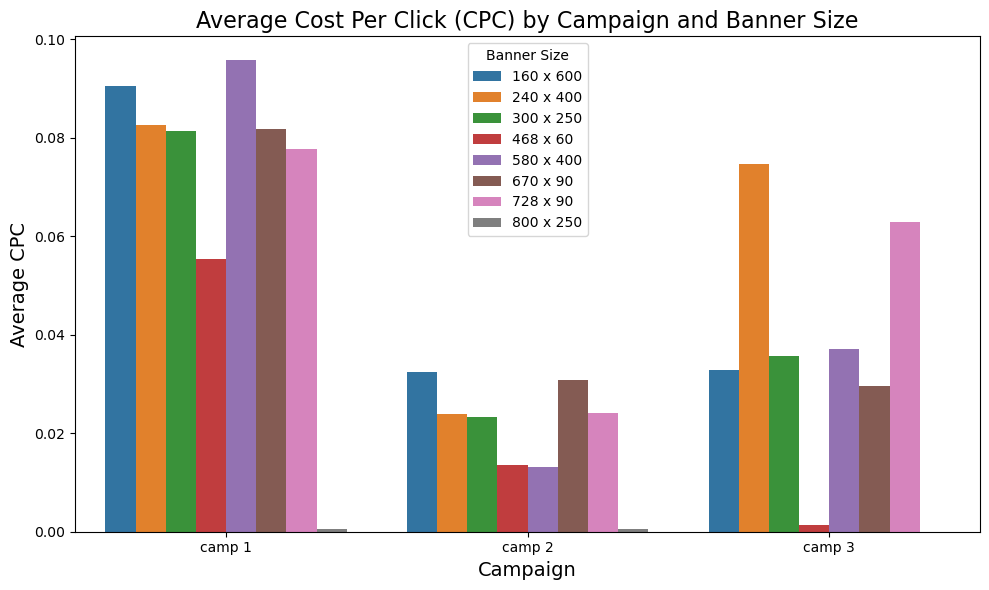

In [44]:
df['CPC'] = df.apply(lambda row: row['cost'] / row['clicks'] if row['clicks'] > 0 else 0, axis=1)
# Group by Campaign and Banner Size to find average CPC
cpc_summary = df.groupby(['campaign_number', 'banner'])['CPC'].mean().reset_index()

# Display the summary
print(cpc_summary)

# Visualization (optional)
#import matplotlib.pyplot as plt
#import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=cpc_summary, x='campaign_number', y='CPC', hue='banner')
plt.title('Average Cost Per Click (CPC) by Campaign and Banner Size', fontsize=16)
plt.xlabel('Campaign', fontsize=14)
plt.ylabel('Average CPC', fontsize=14)
plt.legend(title='Banner Size')
plt.tight_layout()
plt.show()

18. Are there any campaigns or placements that are particularly cost-effective in terms of generating post-click conversions?

In [45]:
df['Cost per Conversion'] = df.apply(lambda row: row['cost'] / row['clicks'] if row['clicks'] > 0 else 0, axis=1)
# Group by Campaign and Placement to find average cost per conversion
cost_effectiveness_summary = df.groupby(['campaign_number', 'placement'])['Cost per Conversion'].mean().reset_index()

# Display the summary
print(cost_effectiveness_summary)

# Identify the most cost-effective campaigns and placements
most_cost_effective = cost_effectiveness_summary.nsmallest(5, 'Cost per Conversion')
print("Most Cost-Effective Campaigns and Placements:")
print(most_cost_effective)

   campaign_number placement  Cost per Conversion
0           camp 1       abc             0.017521
1           camp 1       def             0.092908
2           camp 1       ghi             0.074524
3           camp 1       jkl             0.048806
4           camp 1       mno             0.103640
5           camp 2       abc             0.000802
6           camp 2       def             0.023967
7           camp 2       ghi             0.040931
8           camp 2       jkl             0.026097
9           camp 2       mno             0.016191
10          camp 3       abc             0.017842
11          camp 3       def             0.044130
12          camp 3       ghi             0.051170
13          camp 3       jkl             0.045399
14          camp 3       mno             0.039114
Most Cost-Effective Campaigns and Placements:
   campaign_number placement  Cost per Conversion
5           camp 2       abc             0.000802
9           camp 2       mno             0.016191
0   

19. Can we identify any trends or patterns in post-click conversion rates based on the day of the week?

  Day of Week  Conversion Rate
0      Friday         0.127565
1      Monday         0.121497
2    Saturday         0.117579
3      Sunday         0.124859
4    Thursday         0.137709
5     Tuesday         0.125460
6   Wednesday         0.120085


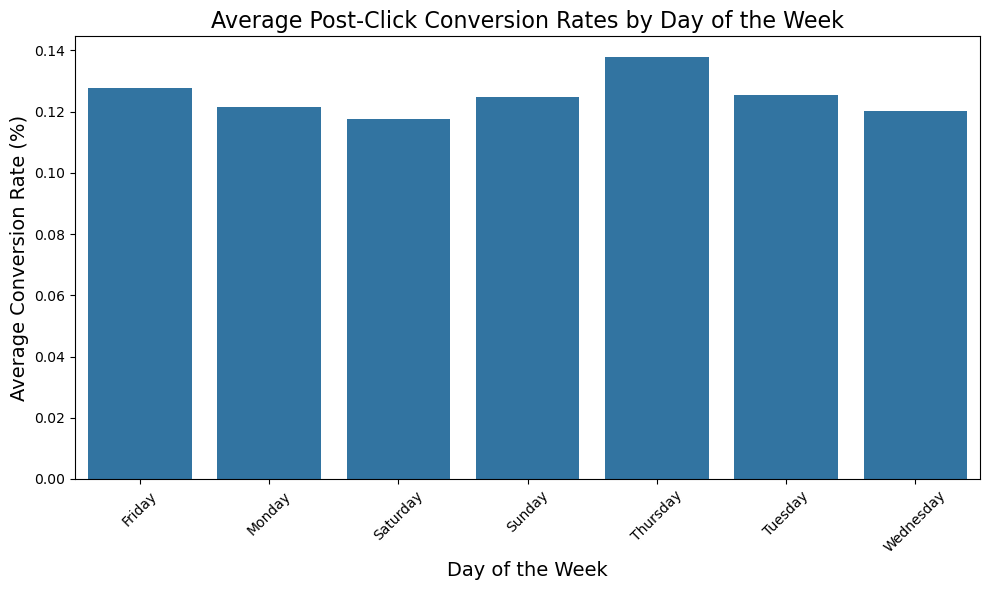

In [46]:
year = 2020
df['date'] = pd.to_datetime(df['month'] + ' ' + df['day'].astype(str) + ' ' + str(year))

df['date'] = pd.to_datetime(df['date'])
df['Day of Week'] = df['date'].dt.day_name()

# Calculate Conversion Rate
df['Conversion Rate'] = df.apply(lambda row: row['post_click_conversions'] / row['clicks'] if row['clicks'] > 0 else 0, axis=1)

# Group by Day of the Week to find average conversion rates
conversion_rate_summary = df.groupby('Day of Week')['Conversion Rate'].mean().reset_index()

# Display the summary
print(conversion_rate_summary)

plt.figure(figsize=(10, 6))
sns.barplot(data=conversion_rate_summary, x='Day of Week', y='Conversion Rate')
plt.title('Average Post-Click Conversion Rates by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Average Conversion Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

20. How does the effectiveness of campaigns vary throughout different user engagement types in terms of post-click conversions?

   user_engagement campaign_number  Post-Click Conversion Rate
0                1          camp 1                   12.524622
1                1          camp 2                    1.834152
2                1          camp 3                    0.526838
3                2          camp 1                   15.367551
4                2          camp 2                    2.158923
5                2          camp 3                    0.996884
6                3          camp 1                         inf
7                3          camp 3                   12.002153


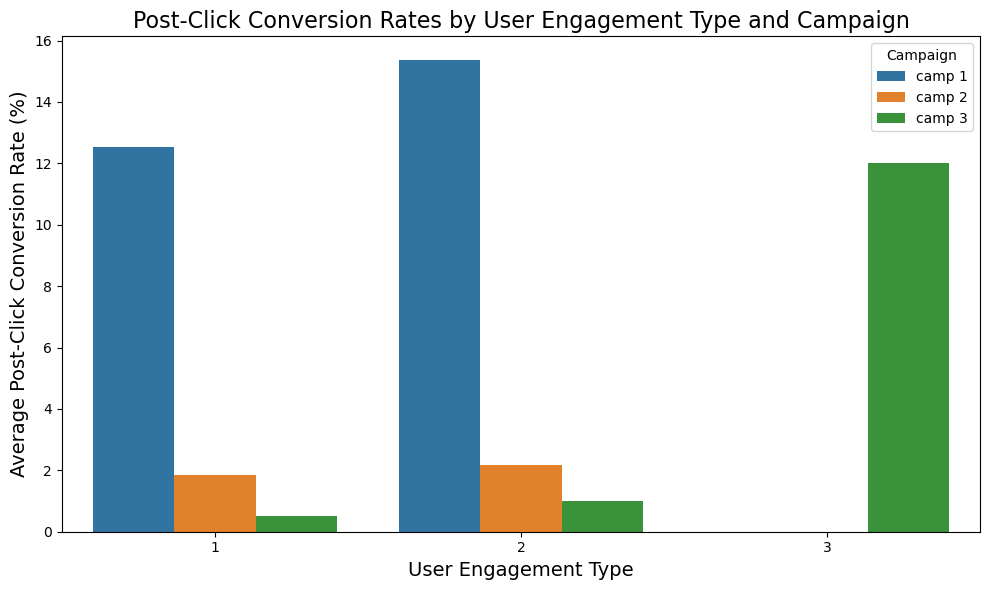

In [47]:
df['Post-Click Conversion Rate'] = (df['post_click_conversions'] / df['clicks']) * 100

# Group by User Engagement and Campaign to find average conversion rates
conversion_rate_summary = df.groupby(['user_engagement', 'campaign_number'])['Post-Click Conversion Rate'].mean().reset_index()

# Display the summary
print(conversion_rate_summary)

# Visualization (optional)
#import matplotlib.pyplot as plt
#import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=conversion_rate_summary, x='user_engagement', y='Post-Click Conversion Rate', hue='campaign_number')
plt.title('Post-Click Conversion Rates by User Engagement Type and Campaign', fontsize=16)
plt.xlabel('User Engagement Type', fontsize=14)
plt.ylabel('Average Post-Click Conversion Rate (%)', fontsize=14)
plt.legend(title='Campaign')
plt.tight_layout()
plt.show()